In [1]:
import pandas as pd
import numpy as np

In [2]:
complete_df = pd.read_csv('./preprocessing/data/filled_data_2022-06-26.tsv', low_memory=False, sep="\t")
filtered_df = complete_df.query("not player_tags.isna()")
display(filtered_df)

bool_cols = [col for col in filtered_df if filtered_df[col].dropna().value_counts().index.isin([0, 1]).all()]
bool_cols

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,dob,...,nationality Ukraine,nationality United Arab Emirates,nationality United States,nationality Uruguay,nationality Uzbekistan,nationality Venezuela,nationality Vietnam,nationality Wales,nationality Zambia,nationality Zimbabwe
2129,226491,https://sofifa.com/player/226491/kieran-tierne...,K. Tierney,Kieran Tierney,"LB, CB, LWB",80,86,31000000.0,69000.0,1997-06-05,...,0,0,0,0,0,0,0,0,0,0
2132,232580,https://sofifa.com/player/232580/gabriel-dos-s...,Gabriel,Gabriel dos Santos Magalhães,CB,79,84,24000000.0,65000.0,1997-12-19,...,0,0,0,0,0,0,0,0,0,0
2136,206654,https://sofifa.com/player/206654/pablo-mari-vi...,Pablo Marí,Pablo Marí Villar,CB,76,78,8000000.0,60000.0,1993-08-31,...,0,0,0,0,0,0,0,0,0,0
2141,207993,https://sofifa.com/player/207993/sead-kolasina...,S. Kolašinac,Sead Kolašinac,"LB, LWB, CB",75,75,5000000.0,60000.0,1993-06-20,...,0,0,0,0,0,0,0,0,0,0
2154,229906,https://sofifa.com/player/229906/leon-bailey/2...,L. Bailey,Leon Bailey Butler,"RM, RW, LW",82,85,41500000.0,75000.0,1997-08-09,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18914,213488,https://sofifa.com/player/213488/daniel-de-sil...,D. De Silva,Daniël De Silva,"LM, CAM",67,70,1400000.0,2000.0,1997-03-06,...,0,0,0,0,0,0,0,0,0,0
18916,213321,https://sofifa.com/player/213321/tomi-juric/22...,T. Jurić,Tomi Jurić,ST,66,66,850000.0,2000.0,1991-07-22,...,0,0,0,0,0,0,0,0,0,0
18978,188292,https://sofifa.com/player/188292/jose-carlos-f...,J. Fernandez,José Carlos Fernández Piedra,ST,66,66,300000.0,500.0,1983-05-14,...,0,0,0,0,0,0,0,0,0,0
19146,262751,https://sofifa.com/player/262751/ruas-machado-...,Pedro Machado,Ruas Machado Pedro Miguel,CB,61,67,450000.0,2000.0,1996-06-22,...,0,0,0,0,0,0,0,0,0,0


['obese',
 'underweight',
 'trait Cautious With Crosses',
 'trait Chip Shot (AI)',
 'trait Comes For Crosses',
 'trait Dives Into Tackles (AI)',
 'trait Early Crosser',
 'trait Finesse Shot',
 'trait Flair',
 'trait GK Long Throw',
 'trait Giant Throw-in',
 'trait Injury Prone',
 'trait Leadership',
 'trait Long Passer (AI)',
 'trait Long Shot Taker (AI)',
 'trait Long Throw-in',
 'trait One Club Player',
 'trait Outside Foot Shot',
 'trait Playmaker (AI)',
 'trait Power Free-Kick',
 'trait Power Header',
 'trait Rushes Out Of Goal',
 'trait Saves with Feet',
 'trait Solid Player',
 'trait Speed Dribbler (AI)',
 'trait Team Player',
 'trait Technical Dribbler (AI)',
 'tag #Acrobat',
 'tag #Aerial Threat',
 'tag #Clinical Finisher',
 'tag #Complete Defender',
 'tag #Complete Forward',
 'tag #Complete Midfielder',
 'tag #Crosser',
 'tag #Distance Shooter',
 'tag #Dribbler',
 'tag #Engine',
 'tag #FK Specialist',
 'tag #Playmaker',
 'tag #Poacher',
 'tag #Speedster',
 'tag #Strength',
 't

## Selecionando colunas booleanas para tirar insights de classificadores

In [3]:
# Removendo colunas de nacionalidade, ids, urls e colunas não numéricas
features = filtered_df.columns[~filtered_df.columns[:].str.match('(.*_id.*|.*id_.*|.*url.*|nationality)')].to_list()
features = filtered_df[features]._get_numeric_data()
features

,overall,potential,value_eur,wage_eur,weight_kg,height_cm,club_jersey_number,weak_foot,skill_moves,international_reputation,...,body type Lean (185+),body type Normal (170-),body type Normal (170-185),body type Normal (185+),body type Stocky (170-),body type Stocky (170-185),body type Stocky (185+),body type Unique,preferred foot Left,preferred foot Right
2129,80,86,31000000.0,69000.0,70,178,3.0,3,3,2,...,0,0,1,0,0,0,0,0,1,0
2132,79,84,24000000.0,65000.0,87,190,6.0,2,2,2,...,0,0,0,1,0,0,0,0,1,0
2136,76,78,8000000.0,60000.0,87,193,22.0,3,2,2,...,0,0,0,1,0,0,0,0,1,0
2141,75,75,5000000.0,60000.0,82,183,31.0,2,3,2,...,0,0,0,0,0,1,0,0,1,0
2154,82,85,41500000.0,75000.0,77,178,31.0,4,4,3,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18914,67,70,1400000.0,2000.0,60,170,7.0,4,3,1,...,0,0,0,0,0,0,0,0,0,1
18916,66,66,850000.0,2000.0,85,191,9.0,4,3,1,...,0,0,0,1,0,0,0,0,0,1
18978,66,66,300000.0,500.0,90,188,22.0,3,2,1,...,0,0,0,1,0,0,0,0,0,1
19146,61,67,450000.0,2000.0,90,191,44.0,2,2,1,...,0,0,0,1,0,0,0,0,0,1


## Separando preditores e labels

In [4]:
X, y = features.drop('tag #FK Specialist', axis=1), filtered_df['tag #FK Specialist']

## Tirando insights sobre melhores features

In [5]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV


# define the method
selector = RFECV(estimator=LogisticRegression(), scoring='recall', n_jobs=-1)

# fit the model
selector = selector.fit(X, y)

# Report feature ranking
order = pd.DataFrame({'coluna': X.columns}, index=selector.ranking_).sort_index().rename_axis('prioridade', axis=1)
order

/home/gustavo/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gustavo/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

CPU times: user 44.1 s, sys: 2min 22s, total: 3min 7s
Wall time: 48.8 s


/home/gustavo/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


prioridade,coluna
1,skill_fk_accuracy
2,skill_dribbling
3,potential
4,bmi
5,goalkeeping_reflexes
...,...
153,trait Rushes Out Of Goal
154,trait Saves with Feet
155,trait GK Long Throw
156,trait Cautious With Crosses


Vamos então treinar um classificador de Regressão Logística para prever se um jogador é especialista em tiro livre ou não

# Treinando modelo

In [6]:
feature_columns = order.query("index == 1").coluna.to_list()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

In [8]:
X_train, X_test, y_train, y_test = train_test_split(filtered_df[["skill_fk_accuracy"]], filtered_df['tag #FK Specialist'], random_state=0)

In [9]:
# Treinando modelo
model = LogisticRegressionCV(scoring= 'recall').fit(X_train, y_train)

# Avaliando Modelo

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

In [11]:
y_pred = model.predict(X_test)

### Acurácia

In [12]:
acuracia = accuracy_score(y_test, y_pred)
print(f'acurácia = {acuracia:.3f}')

acurácia = 1.000


### Recall

In [13]:
rc = recall_score(y_test, y_pred)
print(f'recall = {rc:.3f}')

recall = 1.000


### Verificando labels ou classes do nosso modelo

In [14]:
model.classes_

array([0, 1])

### Verificando coeficiente de correlação de cada uma das features

In [15]:
for i in range(len(model.coef_)):
    print(f'model.coef_  = {model.coef_[i].round(3)}')

model.coef_  = [1.373]


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=2)

In [17]:
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

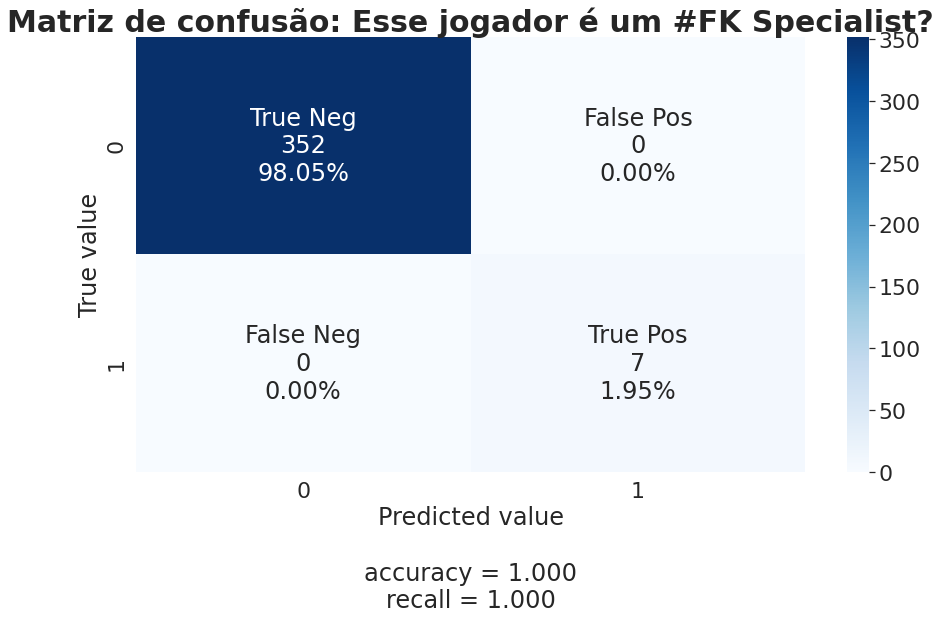

In [18]:
plt.figure(figsize=(15,8))
plt.title('Matriz de confusão: Esse jogador é um #FK Specialist?', weight='bold').set_fontsize(30)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cmap='Blues')
plt.xlabel(f'Predicted value\n\naccuracy = {acuracia:.3f}\nrecall = {rc:.3f}')
plt.ylabel('True value')
plt.show()

In [19]:
filtered_df[['skill_fk_accuracy', 'tag #FK Specialist']].corr()

,skill_fk_accuracy,tag #FK Specialist
skill_fk_accuracy,1.000000,0.290613
tag #FK Specialist,0.290613,1.000000


## Criando o modelo de SVM para classificar cabeceadores

In [27]:
from sklearn.metrics import classification_report

from sklearn.exceptions import UndefinedMetricWarning

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


columns_to_drop = [
    "sofifa_id", "player_url", "short_name", "long_name",
    "dob", "club_position","player_traits", "player_tags",
    "player_positions", "work_rate", "body_type",
    "preferred_foot", "nationality_name"
]


features_df = complete_df.drop(columns=columns_to_drop)
tags_to_predict = [
    column for column in features_df.columns if column.startswith('tag #')
]

for tag in tags_to_predict:

    # Separando features e target do nosso dataset
    feature_columns_without_tags = [
        column for column in features_df.columns
        if column not in tags_to_predict
    ]
    target_column = tag

    features = features_df[feature_columns_without_tags]
    target = features_df[target_column]

    # Train test split
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)


    # Criando e treinando o modelo
    model = LogisticRegression().fit(features_train, target_train)

    # Avaliando o modelo
    predicted_target = model.predict(features_test)
    print(f'{tag}')
    print(f'Classification Report: \n{classification_report(target_test, predicted_target)}')
    print('-'*100)
    print('\n')




tag #Acrobat
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3766
           1       0.75      0.04      0.08        70

    accuracy                           0.98      3836
   macro avg       0.87      0.52      0.54      3836
weighted avg       0.98      0.98      0.97      3836

----------------------------------------------------------------------------------------------------
tag #Aerial Threat
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3817
           1       0.00      0.00      0.00        19

    accuracy                           1.00      3836
   macro avg       0.50      0.50      0.50      3836
weighted avg       0.99      1.00      0.99      3836

----------------------------------------------------------------------------------------------------
tag #Clinical Finisher
Classification Report: 
              pre

['tag #Acrobat',
 'tag #Aerial Threat',
 'tag #Clinical Finisher',
 'tag #Complete Defender',
 'tag #Complete Forward',
 'tag #Complete Midfielder',
 'tag #Crosser',
 'tag #Distance Shooter',
 'tag #Dribbler',
 'tag #Engine',
 'tag #FK Specialist',
 'tag #Playmaker',
 'tag #Poacher',
 'tag #Speedster',
 'tag #Strength',
 'tag #Tackling',
 'tag #Tactician']